In [9]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.optimizers import SGD

import warnings
warnings.simplefilter("ignore")

tf.random.set_seed(455)
np.random.seed(455)


In [10]:
end = datetime.now()
start = datetime(2016, end.month, end.day)
dataset = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


In [11]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-13,24.672501,24.780001,24.275000,24.334999,22.470072,152082000
2016-06-14,24.330000,24.620001,24.187500,24.365000,22.497774,127727600
2016-06-15,24.455000,24.602501,24.257500,24.285000,22.423908,117780800
2016-06-16,24.112499,24.437500,24.017500,24.387501,22.518549,125307200
2016-06-17,24.155001,24.162500,23.825001,23.832500,22.006088,244032800
...,...,...,...,...,...,...
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900


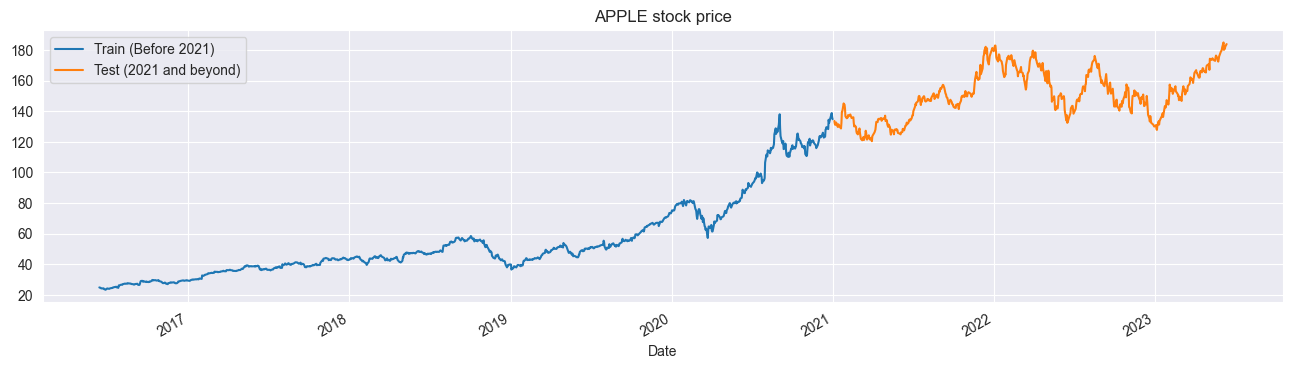

In [12]:
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("APPLE stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [13]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"]
    test = dataset.loc[f"{tend+1}":, "High"]
    return train, test

def train_test_split_values(dataset, tstart, tend):
    train, test =  train_test_split(dataset, tstart, tend)
    return train.values, test.values

training_set, test_set = train_test_split_values(dataset, tstart, tend)

In [14]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [15]:
def split_sequence(sequence, window):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + window
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

window_size = 60
features = 1

X_train, y_train = split_sequence(training_set_scaled, window_size)

In [16]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)